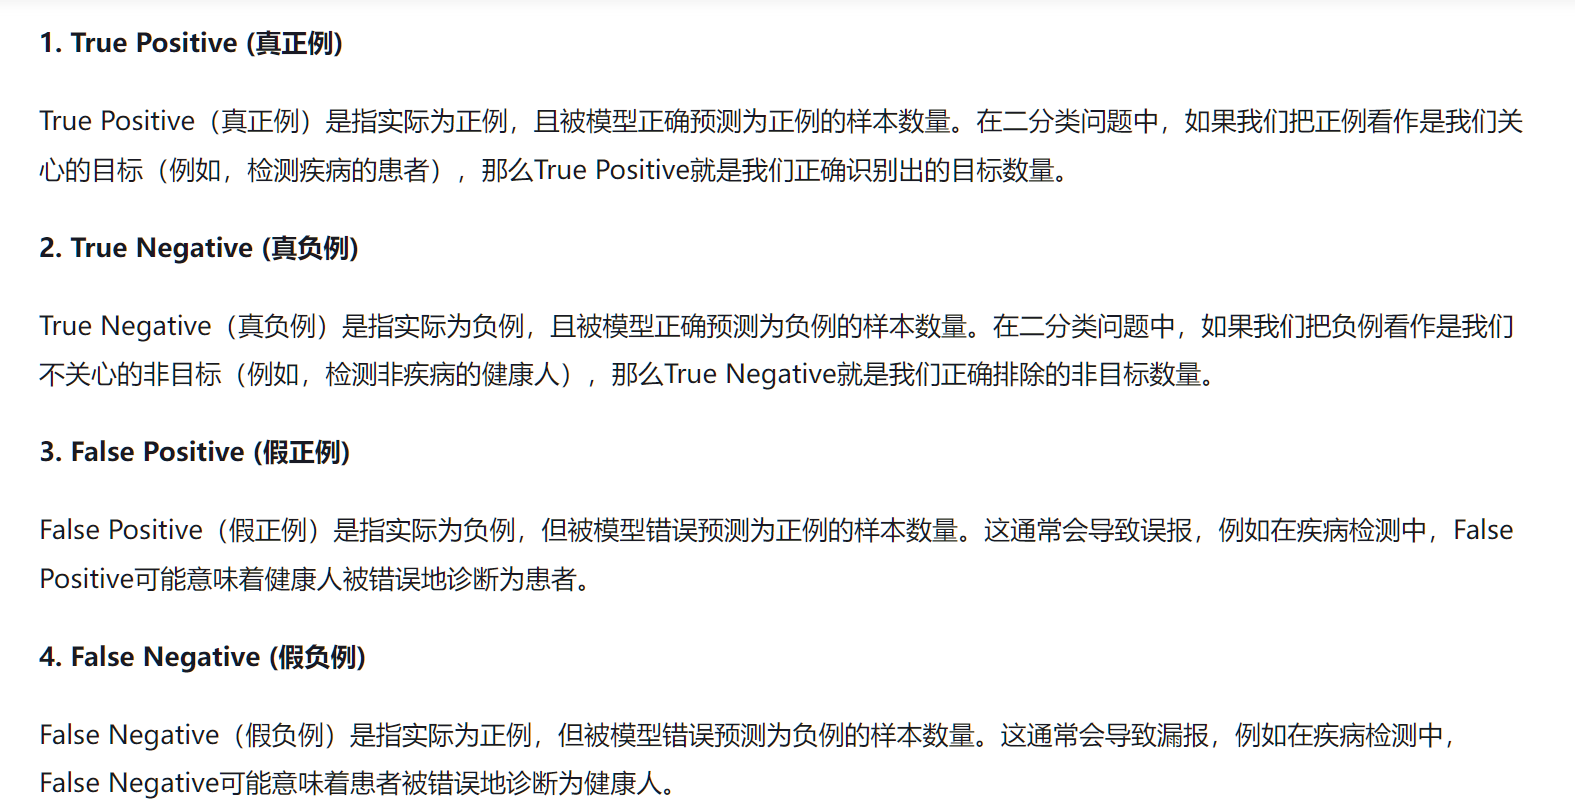

前面的真或假代表预测出的结果是否准确 ， 后面的正与负代表predict的预测结果实际是什么

tp 结果准确了，我的结果为正 >test=1 predict=1

tn 结果准确了，我的结果为负 > test=0 predict=0

fp 结果错了，我的结果为正 >test=0 predict=1

fn 结果错了，我的结果为负 >test=1 predict=0

https://www.lanqiao.cn/courses/40981/learning/?id=2813916&compatibility=false
```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np


def standardization(X):
    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    
    standardized_X = (X - mean) / std
    return standardized_X


def f1_score(y_test, y_pred):
    
    # 真正tp 假正fp 假负fn 
    tp = sum((y_test == 1) & (y_pred == 1))

    fp = sum((y_test == 0) & (y_pred == 1))

    fn = sum((y_test == 1) & (y_pred == 0))
    
    precision = tp / (tp + fp) if (tp + fp)  else 0
    recall = tp / (tp + fn) if (tp + fn)  else 0 

    f1_Result = 2*(precision*recall)/(precision + recall) if (precision+recall) else 0
    return f1_Result


def train():

    file_path = 'classification_data.csv'
    data = pd.read_csv(file_path)

    X = data.drop('target', axis=1).values
    y = data['target'].values

    X = standardization(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    model = SVC()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return (X_train, X_test), (y_train, y_test), y_pred, model


def main():

    (X_train, X_test), (y_train, y_test), y_pred, model = train()
    print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
    # 预期输出 F1 Score: 0.94


if __name__ == '__main__':
    main()
```
